<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P10_Jobsheet_Unsupervise_Learning%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
# dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/ImNotDanish05/2025_KC_TI-1A/main/Data/P10/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1.	Implementasikan K-Means untuk melakukan klusterisasi pengunjung aktif sebuah mall. Gunakan menggunakan metode elbow untuk menentukan jumlah kluster (K), sehingga diperoleh nilai kluster yang optimal untuk membagi pengunjung dalam beberapa kategori. Kemudian buat visualisasinya menggunakan scatter plot seperti pada Percobaan 1.


Nb : Anda bisa me-rename nama kolom untuk memudahkan pemanggilan dalam kode program

In [12]:
X = dataset.iloc[:, [3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'WCSS')

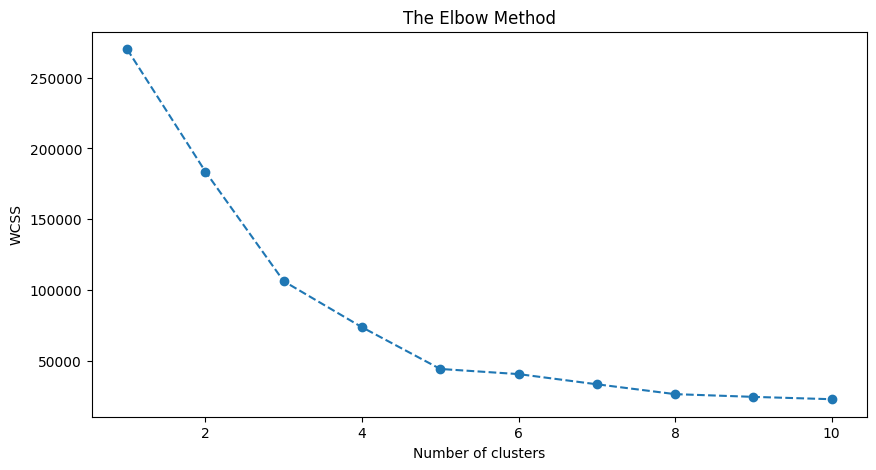

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Jumlah kluster terbaik = 4
# Karena di titik K = 4 terlihat perubahan mulai melambat drastis, membentuk “siku” yang jelas.

In [19]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [20]:
X.iloc[:, 0]

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


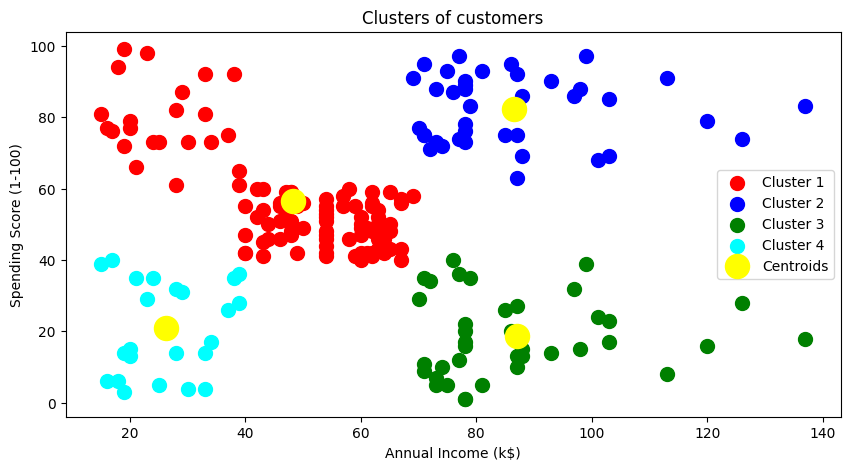

In [21]:
plt.figure(figsize=(10, 5))
X_np = X.to_numpy()
plt.scatter(X_np[y_kmeans == 0, 0], X_np[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1' )
plt.scatter(X_np[y_kmeans == 1, 0], X_np[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2' )
plt.scatter(X_np[y_kmeans == 2, 0], X_np[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3' )
plt.scatter(X_np[y_kmeans == 3, 0], X_np[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids' )
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

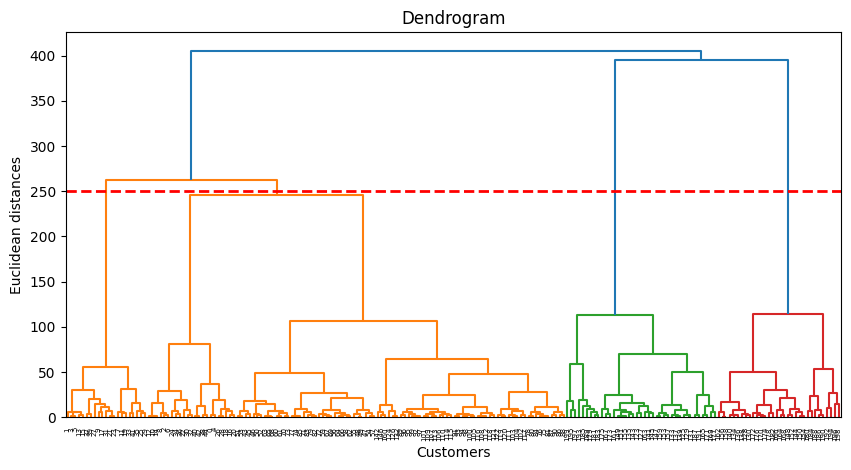

In [23]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=250, color='red', linestyle='--', linewidth=2)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

2.	Menggunakan Dataset yang sama dengan Tugas 1 yaitu jumlah pengunjung aktif mall. Sekarang tampilkan visualisasinya menggunakan teknik DBSCAN. Untuk jumlah kluster (K) harusnya sama seperti klaster pada Tugas 1.

In [24]:
# Import Library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [25]:
# Membuat dataset dengan make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

In [26]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


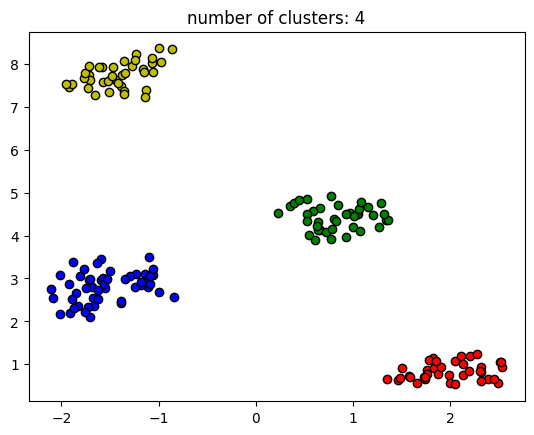

In [30]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()